<a href="https://colab.research.google.com/github/mimii020/traffic_sign_recognition/blob/main/traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import zipfile
import os

# Replace 'your_file.zip' with the name of your uploaded zip file
zip_file_path = '/content/drive/My Drive/archive.zip'
output_folder = '/content/data'  # Name for the folder where you want to extract

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

In [7]:

import cv2
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [8]:
epochs = 30

In [9]:
images = []
labels = []



```
# This is formatted as code
```

Data Loading and Preprocessing

In [10]:
def image_preprocess(image):
  image = cv2.imread(image)
  image = cv2.resize(image, (128,128))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = image / 255.0
  return image

In [11]:
class_names = pd.read_csv('/content/data/labels.csv')['Name']
class_names.head()

data_dir = '/content/data/traffic_Data/DATA'


class_folders = os.listdir(data_dir)

for class_folder in class_folders:
  class_path = os.path.join(data_dir, class_folder)

  if os.path.isdir(class_path):
    for img in os.listdir(class_path):
      img_path = os.path.join(class_path, img)
      if img_path is not None:
        image = image_preprocess(img_path)
        images.append(image)
        labels.append(int(class_folder))
images = np.array(images)
labels = to_categorical(labels, num_classes = 58)
labels = np.array(labels)


In [12]:
print(labels.shape)
print(class_names.shape)

(4170, 58)
(58,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)
#X_train.shape
#y_train.shape

print(X_test.shape)
print(y_test.shape)
print(y_test[0])


(626, 128, 128, 3)
(626, 58)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Data Visualization

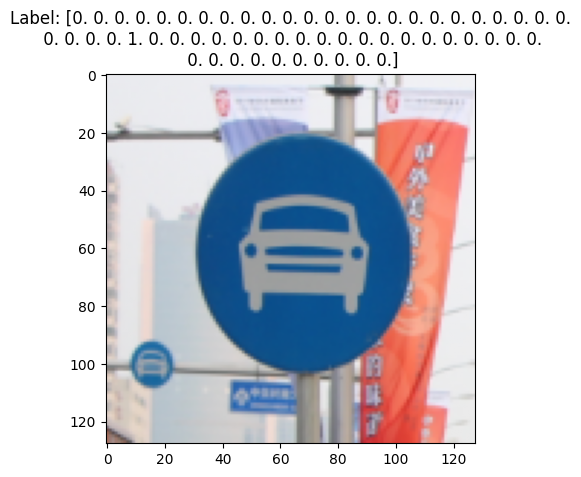

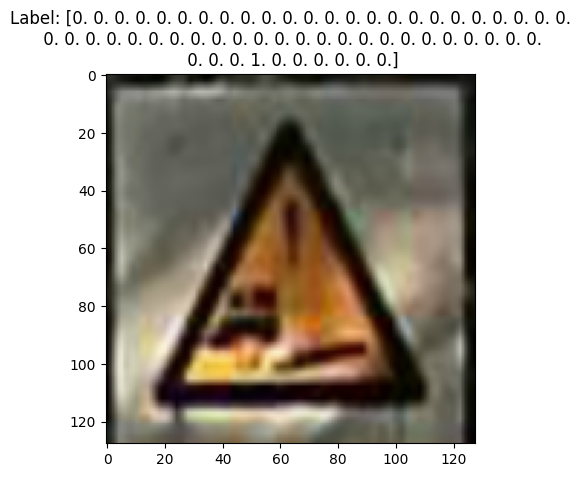

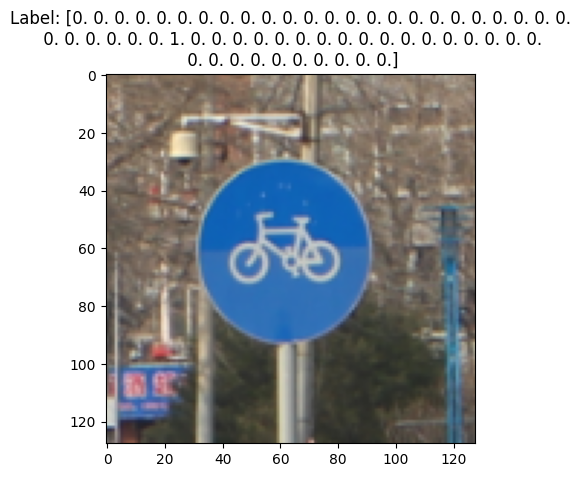

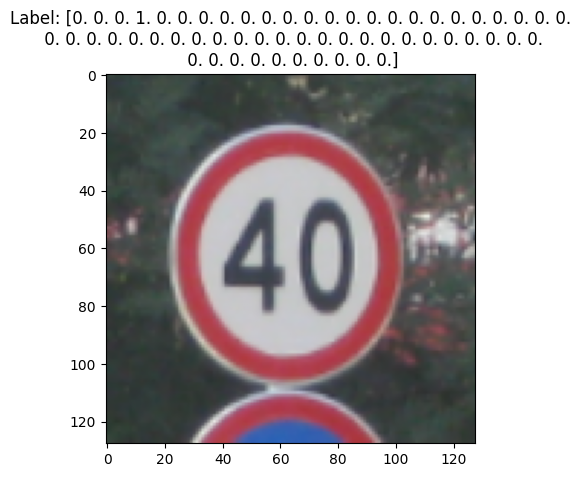

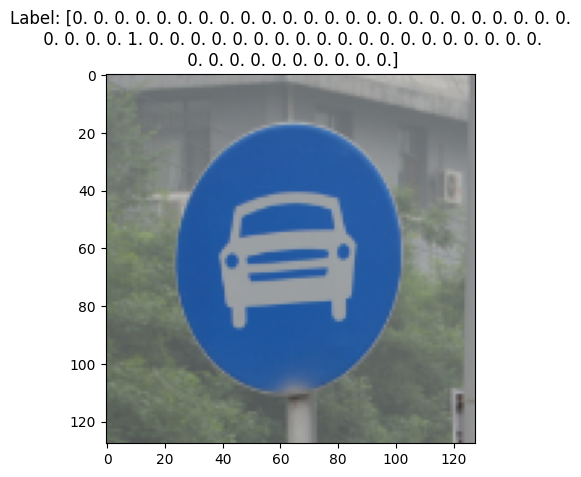

In [14]:
for i in range(5):
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.show()

Model Building And Training

In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (128, 128, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same', input_shape = (128,128)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(58, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy',
                          Precision(),
                          Recall()])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 58)                  │           7,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,295,162 (16.38 MB)

 Trainable params: 4,295,162 (16.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = 64)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.2221 - loss: 3.2639 - precision: 0.5948 - recall: 0.0707 - val_accuracy: 0.6651 - val_loss: 1.5167 - val_precision: 0.9028 - val_recall: 0.4828
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.7359 - loss: 1.0434 - precision: 0.9139 - recall: 0.6134 - val_accuracy: 0.8729 - val_loss: 0.5985 - val_precision: 0.9617 - val_recall: 0.7818
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.9196 - loss: 0.3059 - precision: 0.9693 - recall: 0.8648 - val_accuracy: 0.9137 - val_loss: 0.3738 - val_precision: 0.9484 - val_recall: 0.8809
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9557 - loss: 0.1406 - precision: 0.9720 - recall: 0.9420 - val_accuracy: 0.9560 - val_loss: 0.2707 - val_precision: 0.9683 - val_recall: 0.9512
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.9894 - loss: 0.0448 - precision: 0.9927 - recall: 0.9866 - val_accuracy: 0.9784 - val_loss: 0.2035 

In [ ]:
pickle_out= open("overfit_model.p","wb")  # wb = WRITE BYTE
pickle.dump(model, pickle_out)
pickle_out.close()

Baseline Model Evaluation :

In [ ]:
print(history.history['accuracy'])
print(history.history['recall'])
print(history.history['precision'])

[0.3730729818344116, 0.7910243272781372, 0.927372395992279, 0.9640287756919861, 0.9914354085922241, 0.9979444742202759, 0.9989722371101379, 1.0, 1.0, 1.0]
[0.17985612154006958, 0.6968140006065369, 0.8852346539497375, 0.9499828815460205, 0.9883521795272827, 0.9969167709350586, 0.9986296892166138, 1.0, 1.0, 1.0]
[0.8495145440101624, 0.9304665923118591, 0.9631010293960571, 0.9760647416114807, 0.9941419959068298, 0.9979423880577087, 0.9989718794822693, 1.0, 1.0, 1.0]


In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)

In [ ]:
print(score[1])
print(score[2])
print(score[3])

0.9824140667915344
0.9855653643608093
0.9824140667915344


In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [27]:
print(train_loss)

[3.6198806762695312, 2.480332851409912, 1.7675856351852417, 1.2994345426559448, 0.9960224032402039, 0.7737255692481995, 0.6455123424530029, 0.5502238869667053, 0.4668939411640167, 0.3859981298446655, 0.3690582513809204, 0.30404624342918396, 0.2948427200317383, 0.24875853955745697, 0.21120783686637878, 0.20922699570655823, 0.21264763176441193, 0.1962774097919464, 0.19209900498390198, 0.1358216553926468, 0.17752952873706818, 0.17431361973285675]


In [29]:
def visualize_loss_and_accuracy(train_loss, val_loss, train_accuracy, val_accuracy):
  plt.plot(train_loss)
  plt.plot(val_loss)
  plt.title('loss')
  plt.ylabel('loss')
  plt.legend(['train_loss', 'val_loss'])
  plt.show()
  plt.plot(train_accuracy)
  plt.plot(val_accuracy)
  plt.title('accuracy')
  plt.legend(['train_accuracy', 'val_accuracy'])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
visualize_loss_and_accuracy(train_loss, val_loss, train_accuracy, val_accuracy)

# Interpretation of the learning curves :



*   After the 4th epoch, the training loss reaches 0.0.1 and the validation loss reaches a much higher value that's equal to 0.3
*   After the 4th epoch, the training accuracy reaches 1 whie the validation accuracy reaches a slightlly lower value that's equal to 0.982





# Interpretation of the model metrics :



*   For the training set, the precision and recall are both equal to 1
*   For the validation set, the precision and recall metrics are equal to 0.98



# Conclusion :


*   Since the model seems to be performing perfectly on the training data and slghtly worse on the validation data, this indicates the presence of overfitting




Addressing Overfitting :

Adding Dropout layers to randomly turn off certain neurons during training

In [17]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (128, 128, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same', input_shape = (128,128)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(58, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy',
                          Precision(),
                          Recall()])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 58)                  │           7,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,295,162 (16.38 MB)

 Trainable params: 4,295,162 (16.38 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    verbose = 1,
    restore_best_weights = True
)

In [19]:
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs = epochs,
                    batch_size = 64,
                    callbacks = early_stopping
                    )

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.0863 - loss: 3.9753 - precision_1: 0.2771 - recall_1: 0.0128 - val_accuracy: 0.3600 - val_loss: 2.7290 - val_precision_1: 0.9870 - val_recall_1: 0.1216
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.3419 - loss: 2.6413 - precision_1: 0.8070 - recall_1: 0.1832 - val_accuracy: 0.5824 - val_loss: 1.7026 - val_precision_1: 0.9312 - val_recall_1: 0.3680
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.5153 - loss: 1.8364 - precision_1: 0.8352 - recall_1: 0.3622 - val_accuracy: 0.7664 - val_loss: 1.0448 - val_precision_1: 0.9359 - val_recall_1: 0.5840
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.6466 - loss: 1.3655 - precision_1: 0.8777 - recall_1: 0.5118 - val_accuracy: 0.8336 - val_loss: 0.7267 - val_precision_1: 0.9616 - val_recall_1: 0.7216
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.7161 - loss: 1.0171 - precision_1: 0.8987 - recall_1: 0.6189 - val_

In [30]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

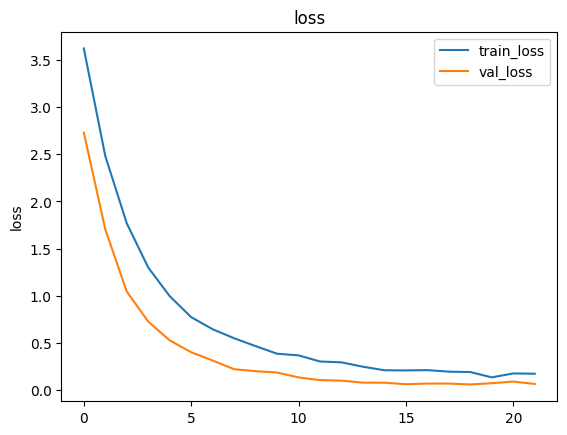

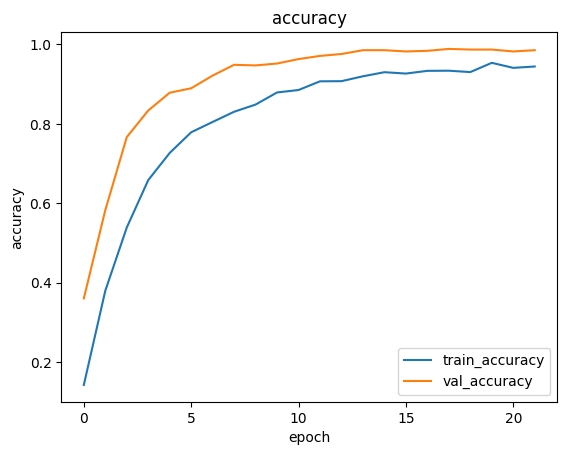

In [31]:
visualize_loss_and_accuracy(train_loss, val_loss, train_accuracy, val_accuracy)

Training accuracy is slightly lower than the validation accuraccy but both are close to 0.93 and 0.98

In [32]:
score = model.evaluate(X_test, y_test, verbose = 0)


In [33]:
print(score[1])
print(score[2])
print(score[3])

0.9808306694030762
0.9823718070983887
0.9792332053184509


The model seems to generalize well to unseen data

In [34]:
pickle_out= open("improved_model.p","wb")  # wb = WRITE BYTE
pickle.dump(model, pickle_out)
pickle_out.close()